In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from keras.datasets import imdb 
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Embedding 
from keras.preprocessing import sequence 
from keras_preprocessing.sequence import pad_sequences

In [ ]:
top_words = 5000 
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=top_words)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
max_review_length = 600 

X_train = pad_sequences(X_train, maxlen=max_review_length) 
X_test = pad_sequences(X_test, maxlen=max_review_length) 

In [ ]:
X_train.shape

(25000, 600)

In [ ]:
print(X_train[1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
import tensorflow as tf

embedding_vector_length = 32 

model = Sequential() 

model.add(Embedding(top_words+1, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(100)) 
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 32)           160032    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 213,333
Trainable params: 213,333
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
hist = model.fit(X_train, Y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 25s 49ms/step - loss: 0.4820 - accuracy: 0.7678 - val_loss: 0.4440 - val_accuracy: 0.7974
Epoch 2/10
391/391 [==============================] - 18s 46ms/step - loss: 0.3574 - accuracy: 0.8528 - val_loss: 0.3656 - val_accuracy: 0.8531
Epoch 3/10
391/391 [==============================] - 31s 80ms/step - loss: 0.2759 - accuracy: 0.8919 - val_loss: 0.3589 - val_accuracy: 0.8605
Epoch 4/10
391/391 [==============================] - 26s 68ms/step - loss: 0.2408 - accuracy: 0.9080 - val_loss: 0.3194 - val_accuracy: 0.8730
Epoch 5/10
391/391 [==============================] - 23s 59ms/step - loss: 0.2402 - accuracy: 0.9050 - val_loss: 0.3279 - val_accuracy: 0.8657
Epoch 6/10
391/391 [==============================] - 22s 56ms/step - loss: 0.2004 - accuracy: 0.9249 - val_loss: 0.3174 - val_accuracy: 0.8713
Epoch 7/10
391/391 [==============================] - 28s 72ms/step - loss: 0.2347 - accuracy: 0.9073 - val_loss: 0.3540 - val_accuracy:

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test Loss:', score[0]) 
print('Test Accuracy:', score[1])

Test Loss: 0.43563663959503174
Test Accuracy: 0.8564000129699707


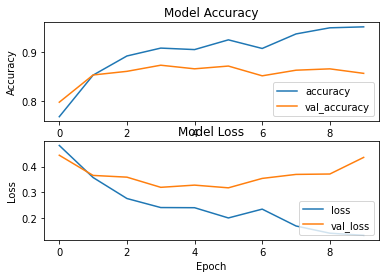

In [ ]:
fig = plt.figure() 

plt.subplot(2, 1, 1) 
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy']) 
plt.xlabel("Epoch") 
plt.ylabel("Accuracy") 
plt.title("Model Accuracy") 
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')  

plt.subplot(2, 1, 2) 
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.xlabel("Epoch") 
plt.ylabel("Loss") 
plt.title("Model Loss") 
plt.legend(['loss', 'val_loss'], loc='lower right')  